In [1]:
import os 
import glob
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [21]:
################################################### 코렙에서 폰트 설정하는법
# 사용가능한 시스템의 TTF 폰트 목록
from matplotlib import font_manager,rc

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 목록에서 처음 10 개만 보기
print('사용가능한 TTF 폰트 개수:', len(font_list), font_list[:10])

# import matplotlib as mpl
import matplotlib.pyplot as plt
 
# 한글이 흐릿하게 보이는 현상 개선
%config InlineBackend.figure_format = 'retina'
 
# 한글이 지원되도록 폰트설치
# !apt -qq -y install fonts-nanum

# 해당폰트가 기본 폰트가 되도록 설정
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
font_manager._rebuild() # 폰트설정관련 rebuild 명령 인가

#################################################### 로컬용 폰트설정
from matplotlib import font_manager,rc

#폰트 경로
font_path = "C:/Windows/Fonts/gulim.ttc"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#font 설정
rc('font',family=font_name)

사용가능한 TTF 폰트 개수: 728 ['C:\\WINDOWS\\Fonts\\BERNHC.TTF', 'C:\\Windows\\Fonts\\PERTILI.TTF', 'C:\\Windows\\Fonts\\GOTHIC.TTF', 'C:\\WINDOWS\\Fonts\\cambriaz.ttf', 'C:\\Windows\\Fonts\\WINGDNG2.TTF', 'C:\\WINDOWS\\Fonts\\LFAX.TTF', 'C:\\WINDOWS\\Fonts\\Inkfree.ttf', 'C:\\Windows\\Fonts\\OLDENGL.TTF', 'C:\\Windows\\Fonts\\ONYX.TTF', 'C:\\Windows\\Fonts\\FRADMIT.TTF']


In [3]:
BASE_DIR = os.path.dirname(os.path.abspath('.'))+"\\data\\PostCorona\\"
BASE_DIR
card = pd.read_csv(BASE_DIR + "card.csv")

In [4]:
# 메모리 부족으로 인해 원본의 1% 샘플링 데이터로 선진행
card = card.sample(int(card.shape[0]/100))
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 2078731 to 1088032
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   receipt_dttm          37776 non-null  int64 
 1   adstrd_code           37776 non-null  int64 
 2   adstrd_nm             37776 non-null  object
 3   mrhst_induty_cl_code  37776 non-null  int64 
 4   mrhst_induty_cl_nm    37776 non-null  object
 5   selng_cascnt          37776 non-null  object
 6   salamt                37776 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.3+ MB


In [5]:
# df['email'].str.count(pat='[0-9]')
# 문자열 중 패턴에 일치한 수 반환
# 석재, 커텐, 영상물, 복지매장, 축협직영매장

err_values = ["석재", "커텐", "영상물", "복지매장", "축협직영매장"]

for err_value in err_values:
    card = card.drop(   card[card["selng_cascnt"] == err_value].index )

card["selng_cascnt"] = card["selng_cascnt"].astype("int64") 
card["salamt"] = card["salamt"].astype("int64") 

card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37166 entries, 2078731 to 1088032
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   receipt_dttm          37166 non-null  int64 
 1   adstrd_code           37166 non-null  int64 
 2   adstrd_nm             37166 non-null  object
 3   mrhst_induty_cl_code  37166 non-null  int64 
 4   mrhst_induty_cl_nm    37166 non-null  object
 5   selng_cascnt          37166 non-null  int64 
 6   salamt                37166 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.3+ MB


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


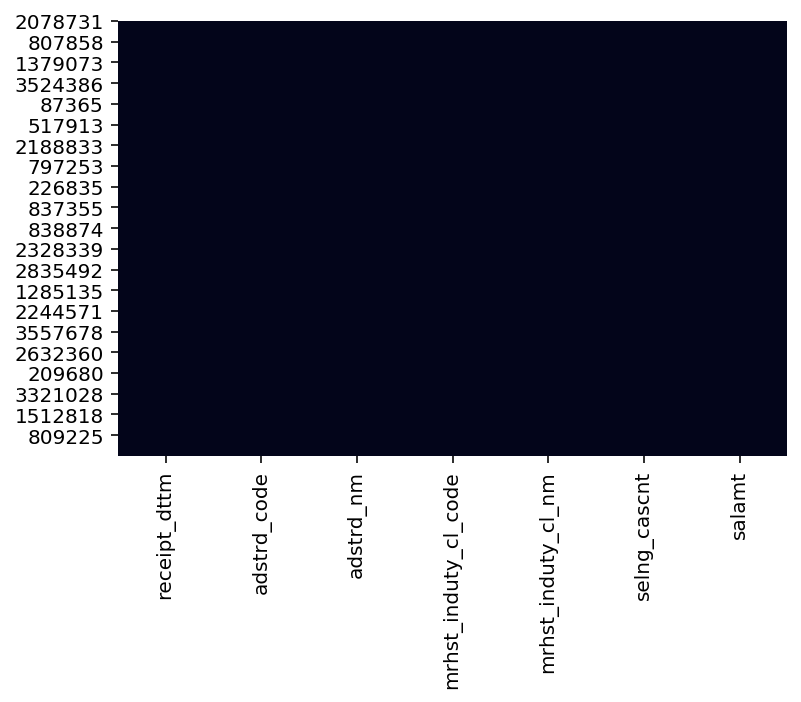

In [6]:
sns.heatmap(card.isnull(), cbar=False )

## 중분류 컬럼 추가

- mrhst_induty_clm_code 이라는 컬럼을 만들어주고 code 슬라이싱해서 앞에 2자리만 가지고 온 후
- mrhst_induty_clm_code 컬럼에 추가한다

In [7]:
card['mrhst_induty_clm_code'] = 0
card['mrhst_induty_cl_code'] = card['mrhst_induty_cl_code'].astype(str)
card['mrhst_induty_clm_code'] = card['mrhst_induty_cl_code'].str.slice(start=0, stop=2)

In [8]:
# 순서 정리
card = card[['receipt_dttm',  'adstrd_code', 'adstrd_nm','mrhst_induty_clm_code', 'mrhst_induty_cl_code',
       'mrhst_induty_cl_nm', 'selng_cascnt', 'salamt']]
# card.head()

In [9]:
# 내가 업무할당 받은 카테고리 코드로 구성된 데이터 프레임 추출
my_card = card[(card.mrhst_induty_clm_code=='84')|
          (card.mrhst_induty_clm_code=='11')|
          (card.mrhst_induty_clm_code=='43')|
          (card.mrhst_induty_clm_code=='41')|
          (card.mrhst_induty_clm_code=='32')|
          (card.mrhst_induty_clm_code=='60')|
          (card.mrhst_induty_clm_code=='62')|
          (card.mrhst_induty_clm_code=='95')|
          (card.mrhst_induty_clm_code=='96')]
# my_card.info()

def weekday(x):
    if x == 0:
        x = "월요일"
    if x == 1:
        x = "화요일"
    if x == 2:
        x = "수요일"
    if x == 3:
        x = "목요일"
    if x == 4:
        x = "금요일"
    if x == 5:
        x = "토요일"
    if x == 6:
        x = "일요일"
    return x

# my_card['receipt_dttm'] = pd.to_datetime(my_card.receipt_dttm) # object to datetime64[ns]
my_card['receipt_dttm'] = pd.to_datetime(my_card['receipt_dttm'], format='%Y%m%d')
my_card['receipt_dttm1']= my_card['receipt_dttm'].dt.strftime('%Y-%m-%d %a') # 변환된 컬럼을 읽어서 요일추가

my_card['week'] = my_card['receipt_dttm'].dt.weekday 
my_card['week'] = my_card['week'].apply(weekday)

C:\Users\Schelpptop\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Schelpptop\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Schelpptop\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
CODE   = '11'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# mrhst_induty_cl_nm 를 총금액 또는 건수로 정렬해보기
X.sort_values(['mrhst_induty_cl_nm', 'selng_cascnt'], ascending=False).groupby('mrhst_induty_cl_nm').head(3).head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_clm_code,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,receipt_dttm1,week
805936,2020-02-24,1165056000,반포1동,11,1101,항 공 사,29,27281400,2020-02-24 Mon,월요일
1271467,2020-03-13,1111061500,종로1.2.3.4가동,11,1101,항 공 사,18,20255700,2020-03-13 Fri,금요일
2017447,2020-04-11,1114052000,소공동,11,1101,항 공 사,5,3591800,2020-04-11 Sat,토요일
2589702,2020-05-02,1147051000,목1동,11,1123,택 시,3099,22955845,2020-05-02 Sat,토요일
3030615,2020-05-19,1153054000,구로3동,11,1123,택 시,68,465400,2020-05-19 Tue,화요일


## 그래프 그리기
- 건수 혹은 금액이 너무 커서 그래프보기가 난해한 항목을 제외하고 그린다.

### 84.홍삼 따위의 건가식품

List of 'mrhst_induty_cl_nm' sorted by its count Index(['기타건강식', '홍삼 제품', '인삼 제품'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['일요일' '화요일' '토요일' '금요일' '목요일' '월요일' '수요일']


Text(0.5, 1.0, "국가표준분류코드 : 84에 해당하는 세분류 구매금액, \n 포함항목 ['기타건강식' '홍삼 제품' '인삼 제품'], \n 제외항목 : []")

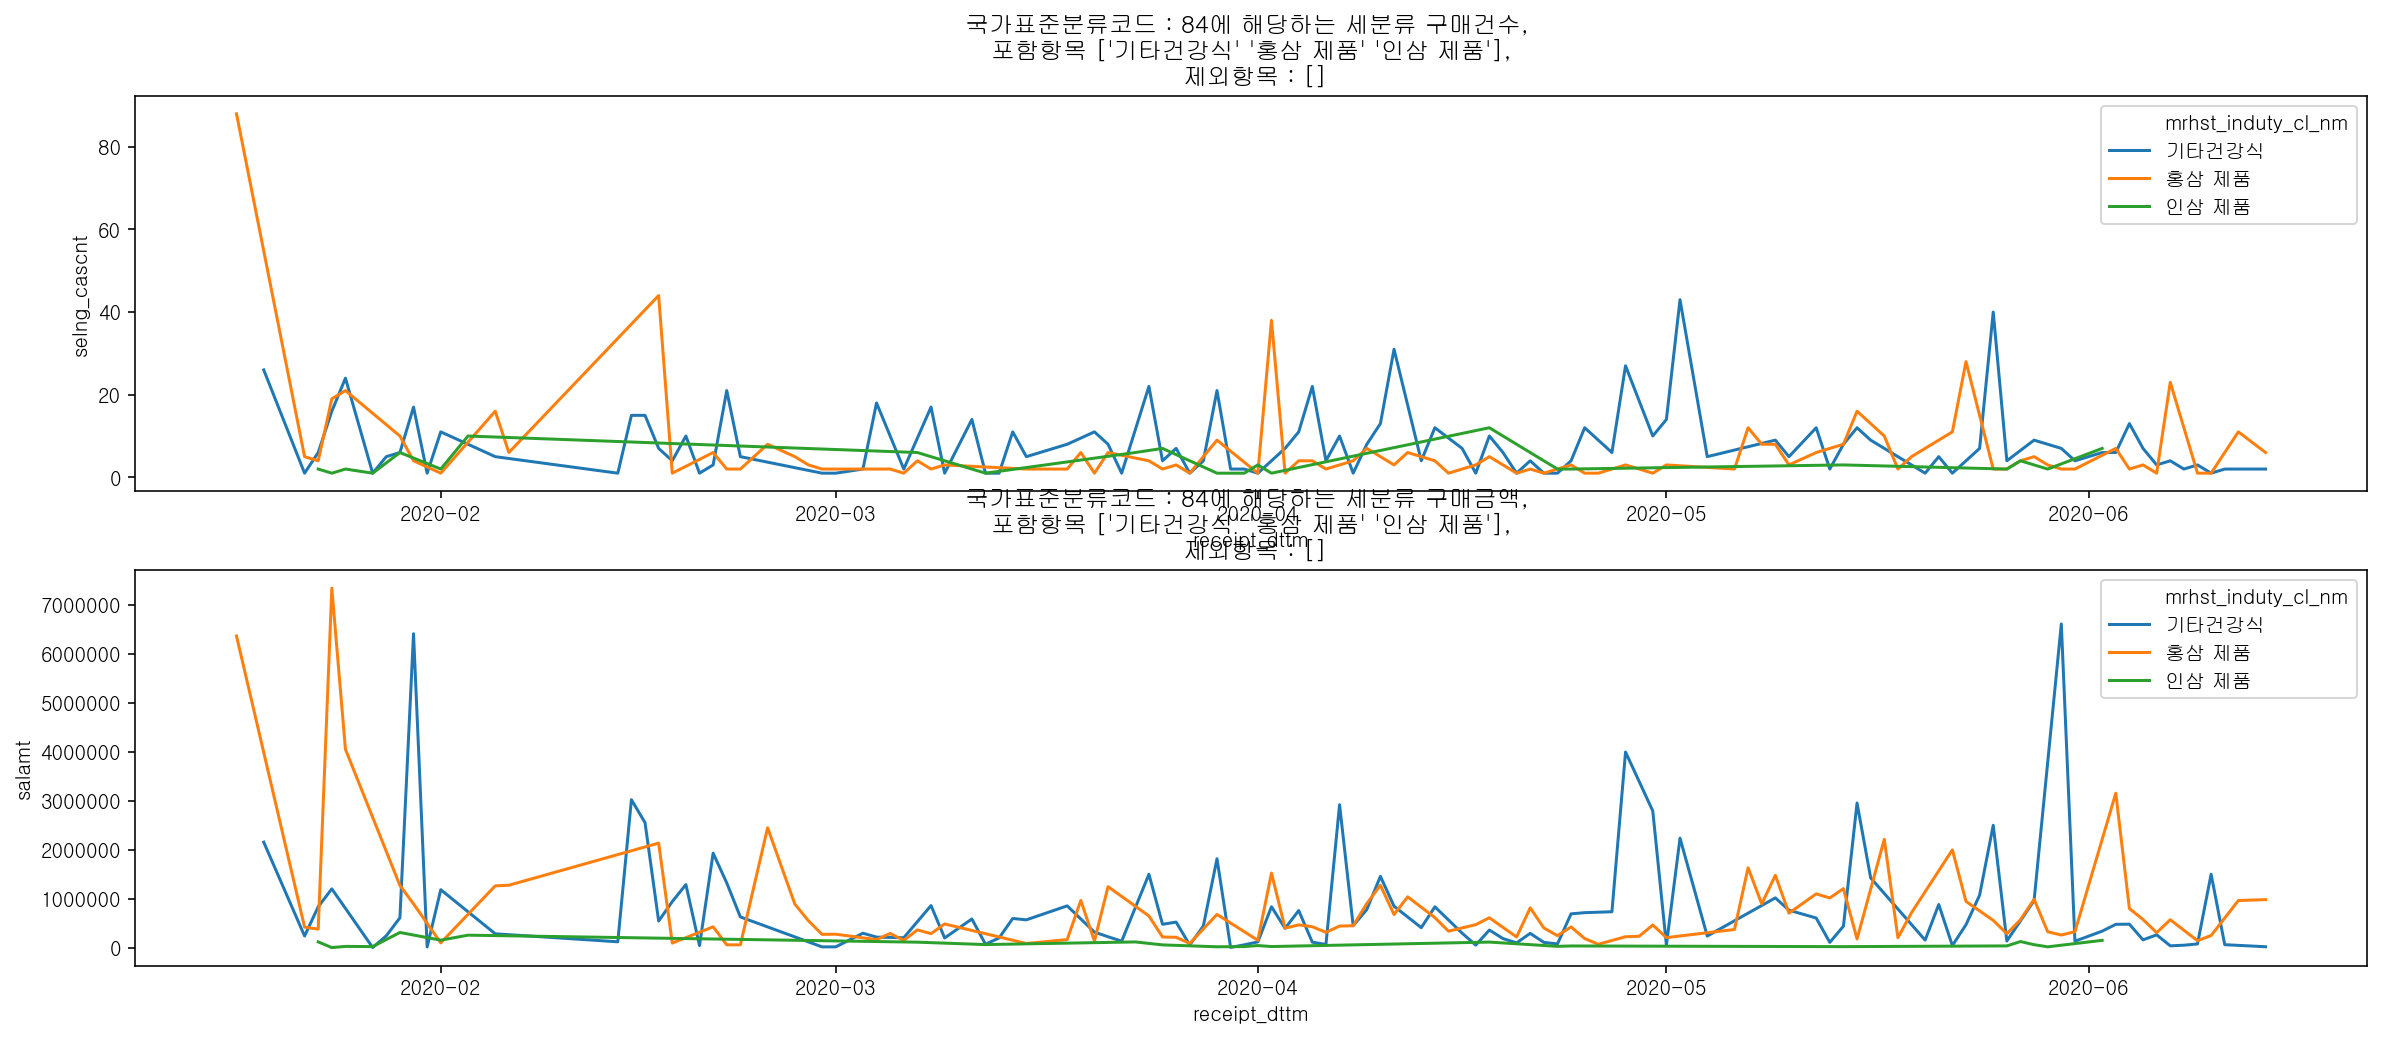

In [22]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '84'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())

if len(remove_ctgrys) >=5:
  remove_ctgrys = remove_ctgrys[:2]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )

# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y-%m-%d %a'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y-%m-%d %a'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 11.교통수단별 소비

List of 'mrhst_induty_cl_nm' sorted by its count Index(['렌 트 카', '관광여행', '고속 버스', '항 공 사', '기타교통수단', '택   시', '철   도', '여 객 선'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['수요일' '월요일' '목요일' '토요일' '일요일' '금요일' '화요일']
60
col_name = 렌 트 카, the number of ctgry removed : 60
32
col_name = 관광여행, the number of ctgry removed : 32
10
col_name = 고속 버스, the number of ctgry removed : 10
9
col_name = 항 공 사, the number of ctgry removed : 9


Text(0.5, 1.0, "국가표준분류코드 : 11에 해당하는 세분류 구매금액, \n 포함항목 ['철   도' '기타교통수단' '택   시' '여 객 선'], \n 제외항목 : Index(['렌 트 카', '관광여행', '고속 버스', '항 공 사'], dtype='object', name='mrhst_induty_cl_nm')")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

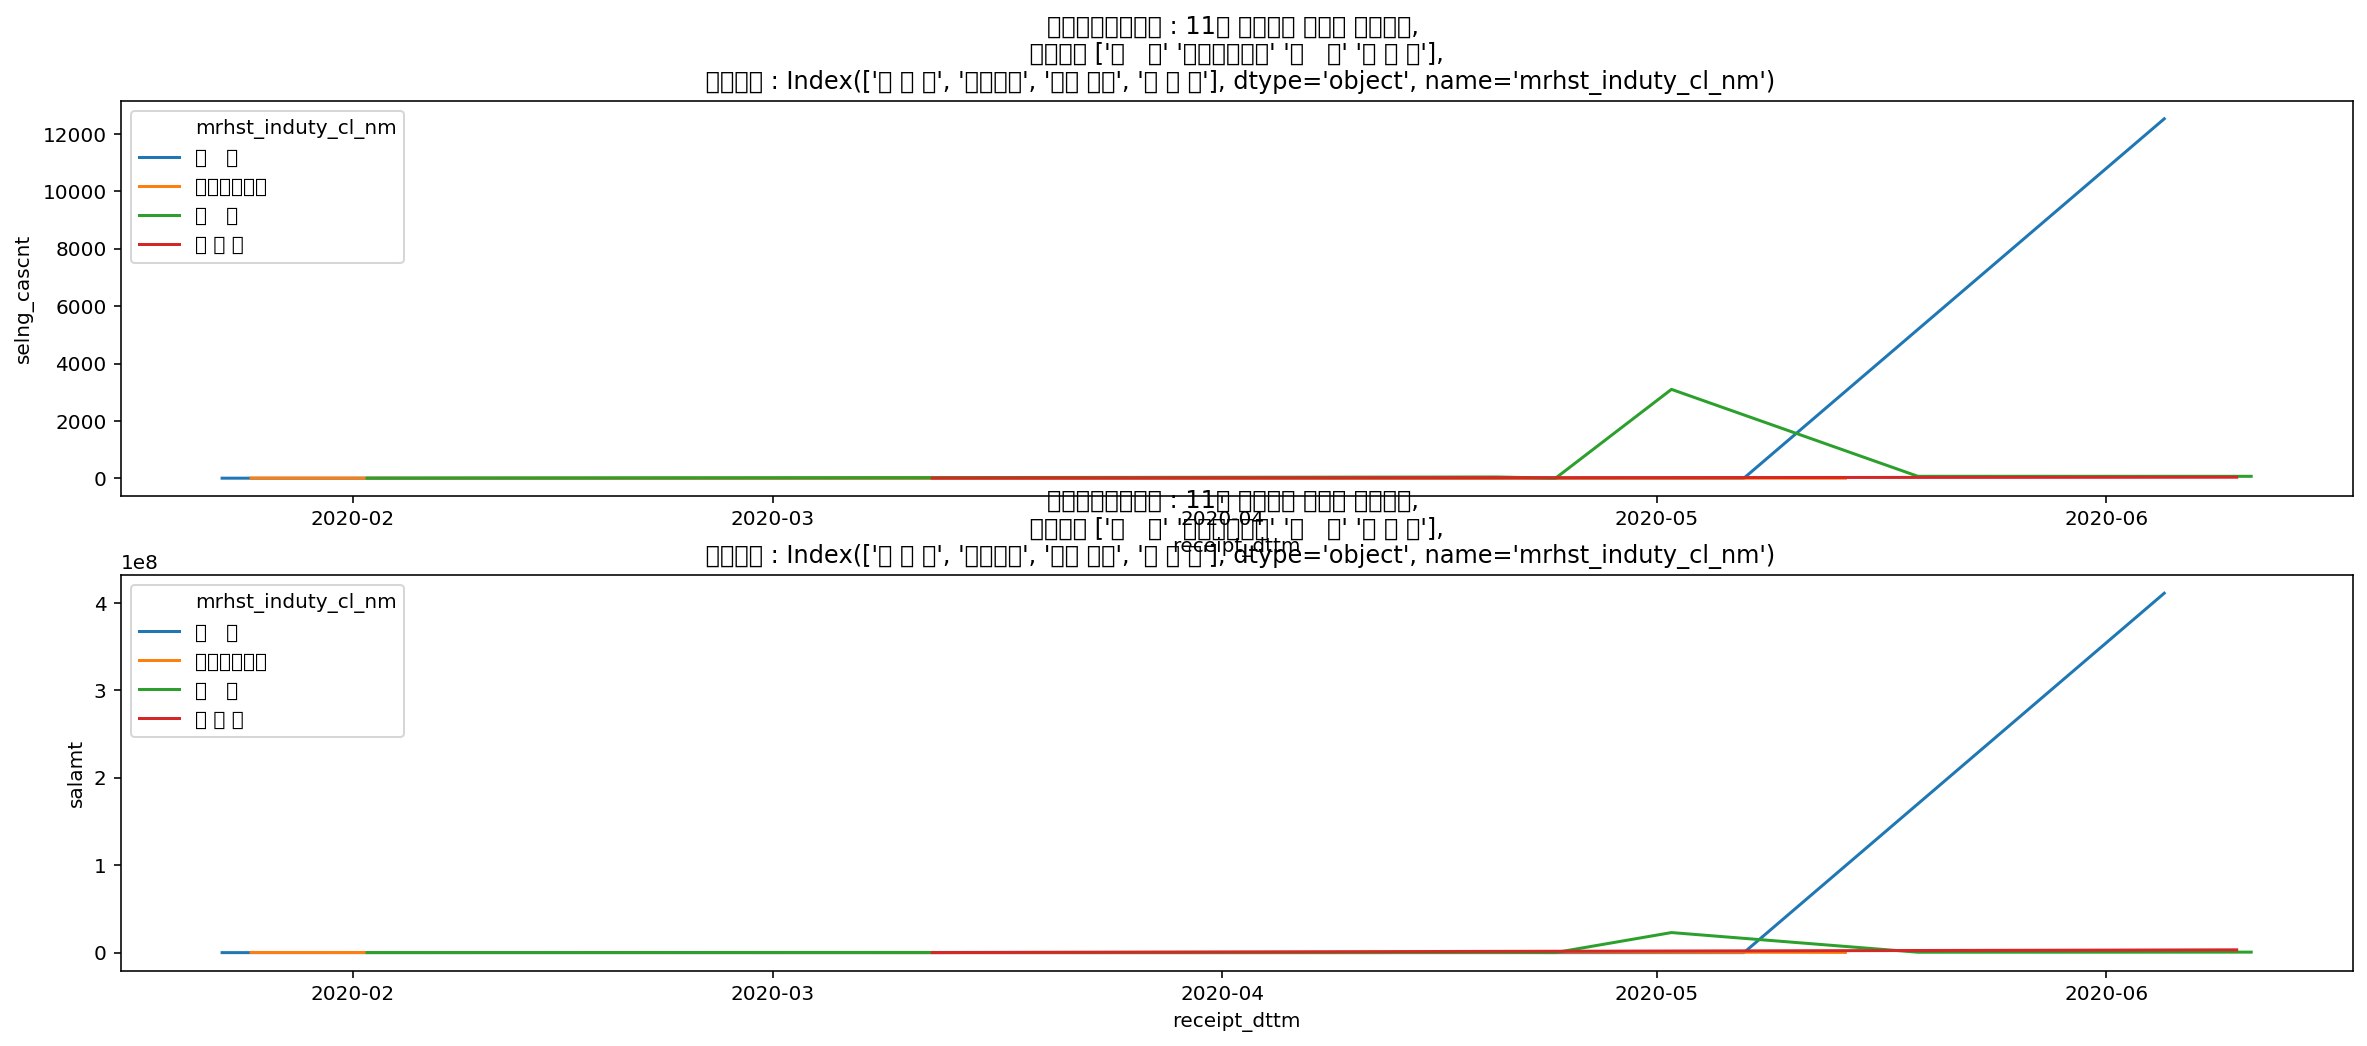

In [12]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '11'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 주중
# X = X[ (X["week"] == "월요일") |
#        (X["week"] == "화요일") |
#        (X["week"] == "수요일") |
#        (X["week"] == "목요일") |        
#        (X["week"] == "금요일") ]
# # 주말
# X = X[ (X["week"] == "토요일") |
#        (X["week"] == "일요일") ]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())
if len(remove_ctgrys) >=5:
  remove_ctgrys = remove_ctgrys[:4]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
    
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 43.직물 

List of 'mrhst_induty_cl_nm' sorted by its count Index(['침구수예점', '옷감 직물', '기타직물', '혼수전문점'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['금요일' '목요일' '수요일' '일요일' '화요일' '토요일' '월요일']


Text(0.5, 1.0, "국가표준분류코드 : 43에 해당하는 세분류 구매금액, \n 포함항목 ['침구수예점' '옷감 직물' '기타직물' '혼수전문점'], \n 제외항목 : []")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

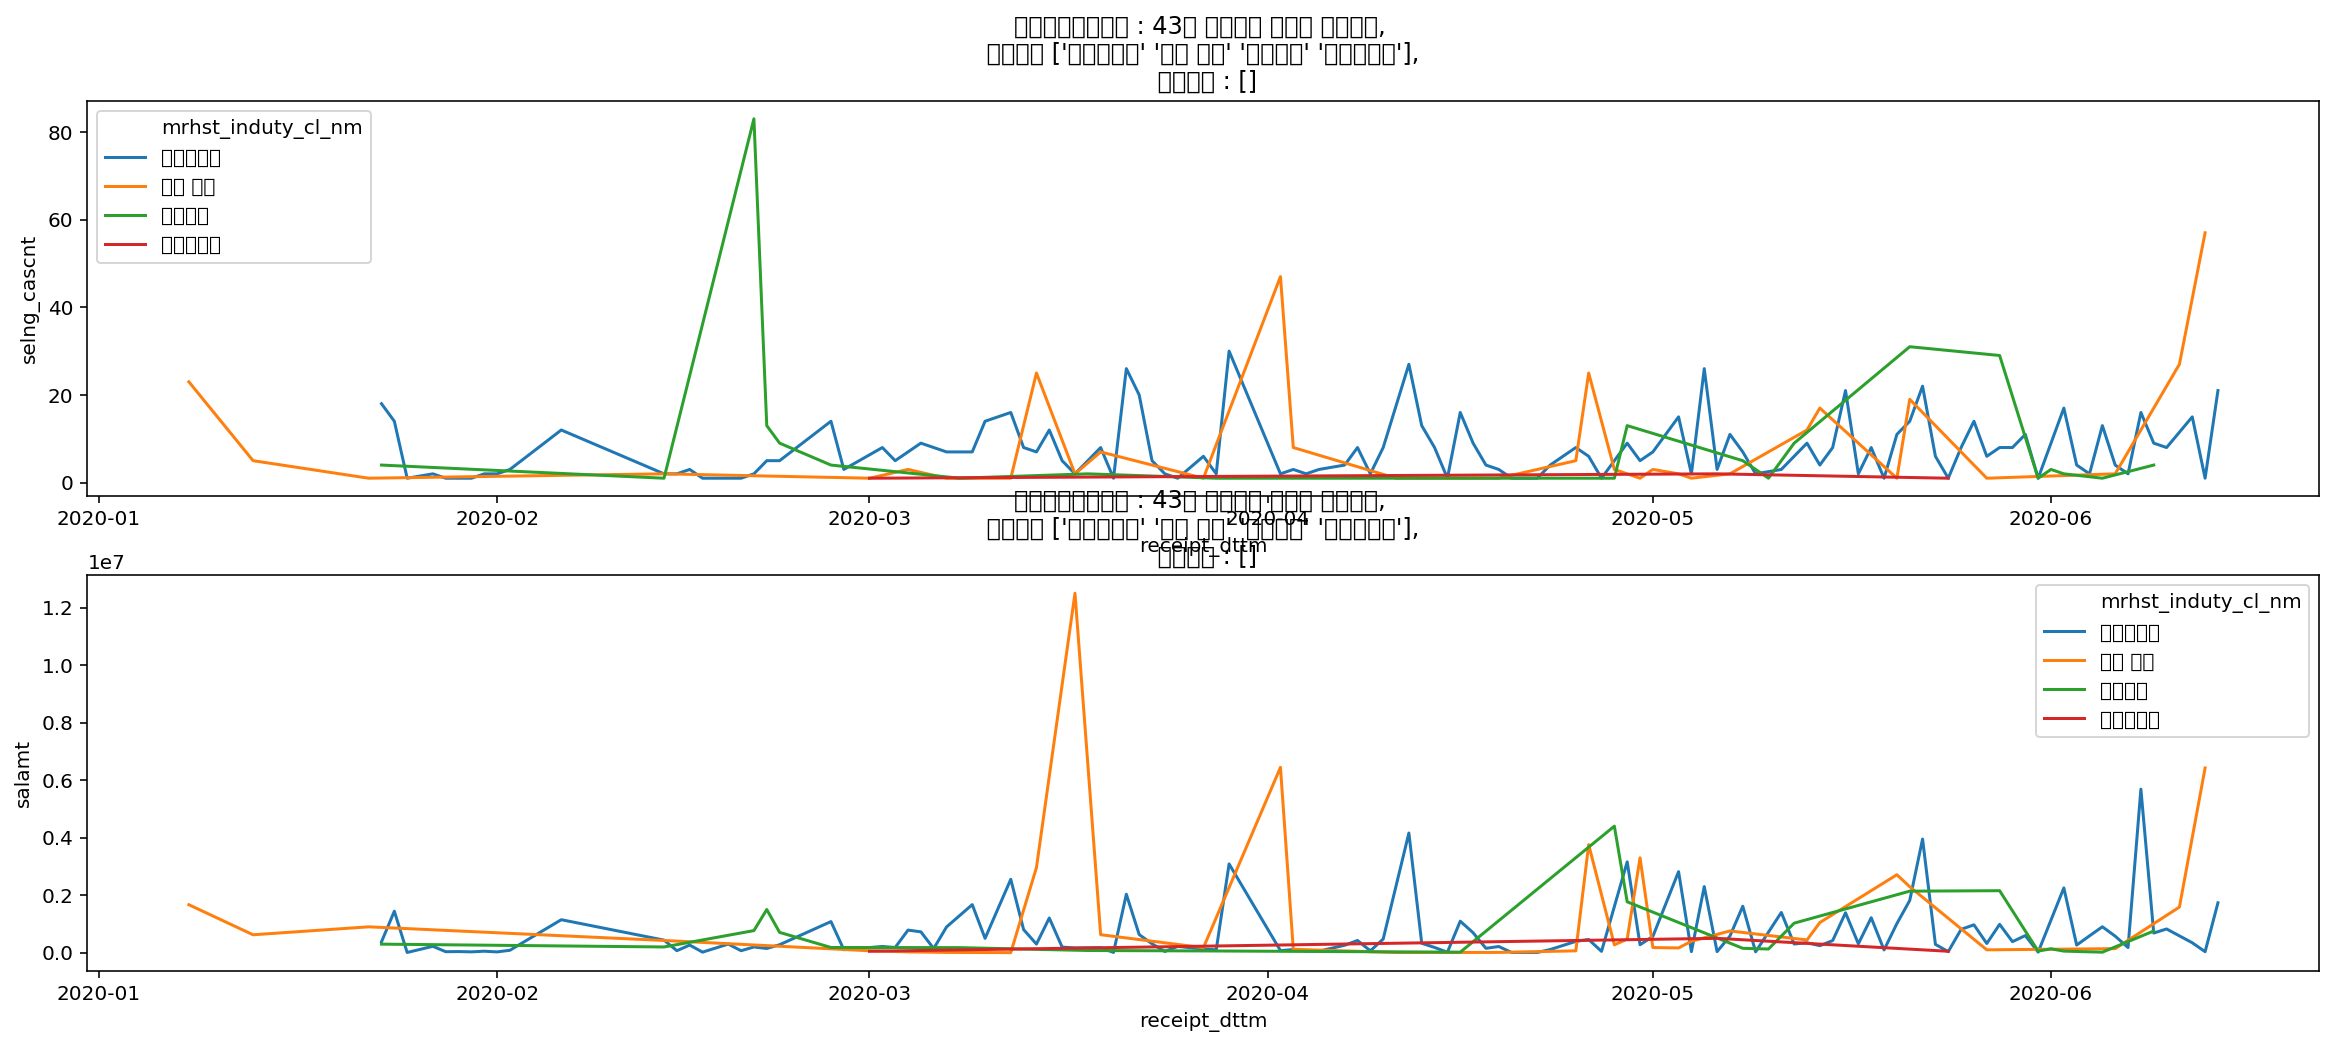

In [13]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '43'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())
if len(remove_ctgrys) >=5:
  remove_ctgrys = remove_ctgrys[:2]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 41.비영리유통(구내매점)

List of 'mrhst_induty_cl_nm' sorted by its count Index(['구내매점(국가기관등)', '공무원연금매점', '기타비영리유통'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['수요일' '토요일' '금요일' '화요일' '일요일' '목요일' '월요일']
68
col_name = 구내매점(국가기관등), the number of ctgry removed : 68


Text(0.5, 1.0, "국가표준분류코드 : 41에 해당하는 세분류 구매금액, \n 포함항목 ['공무원연금매점' '기타비영리유통'], \n 제외항목 : Index(['구내매점(국가기관등)'], dtype='object', name='mrhst_induty_cl_nm')")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

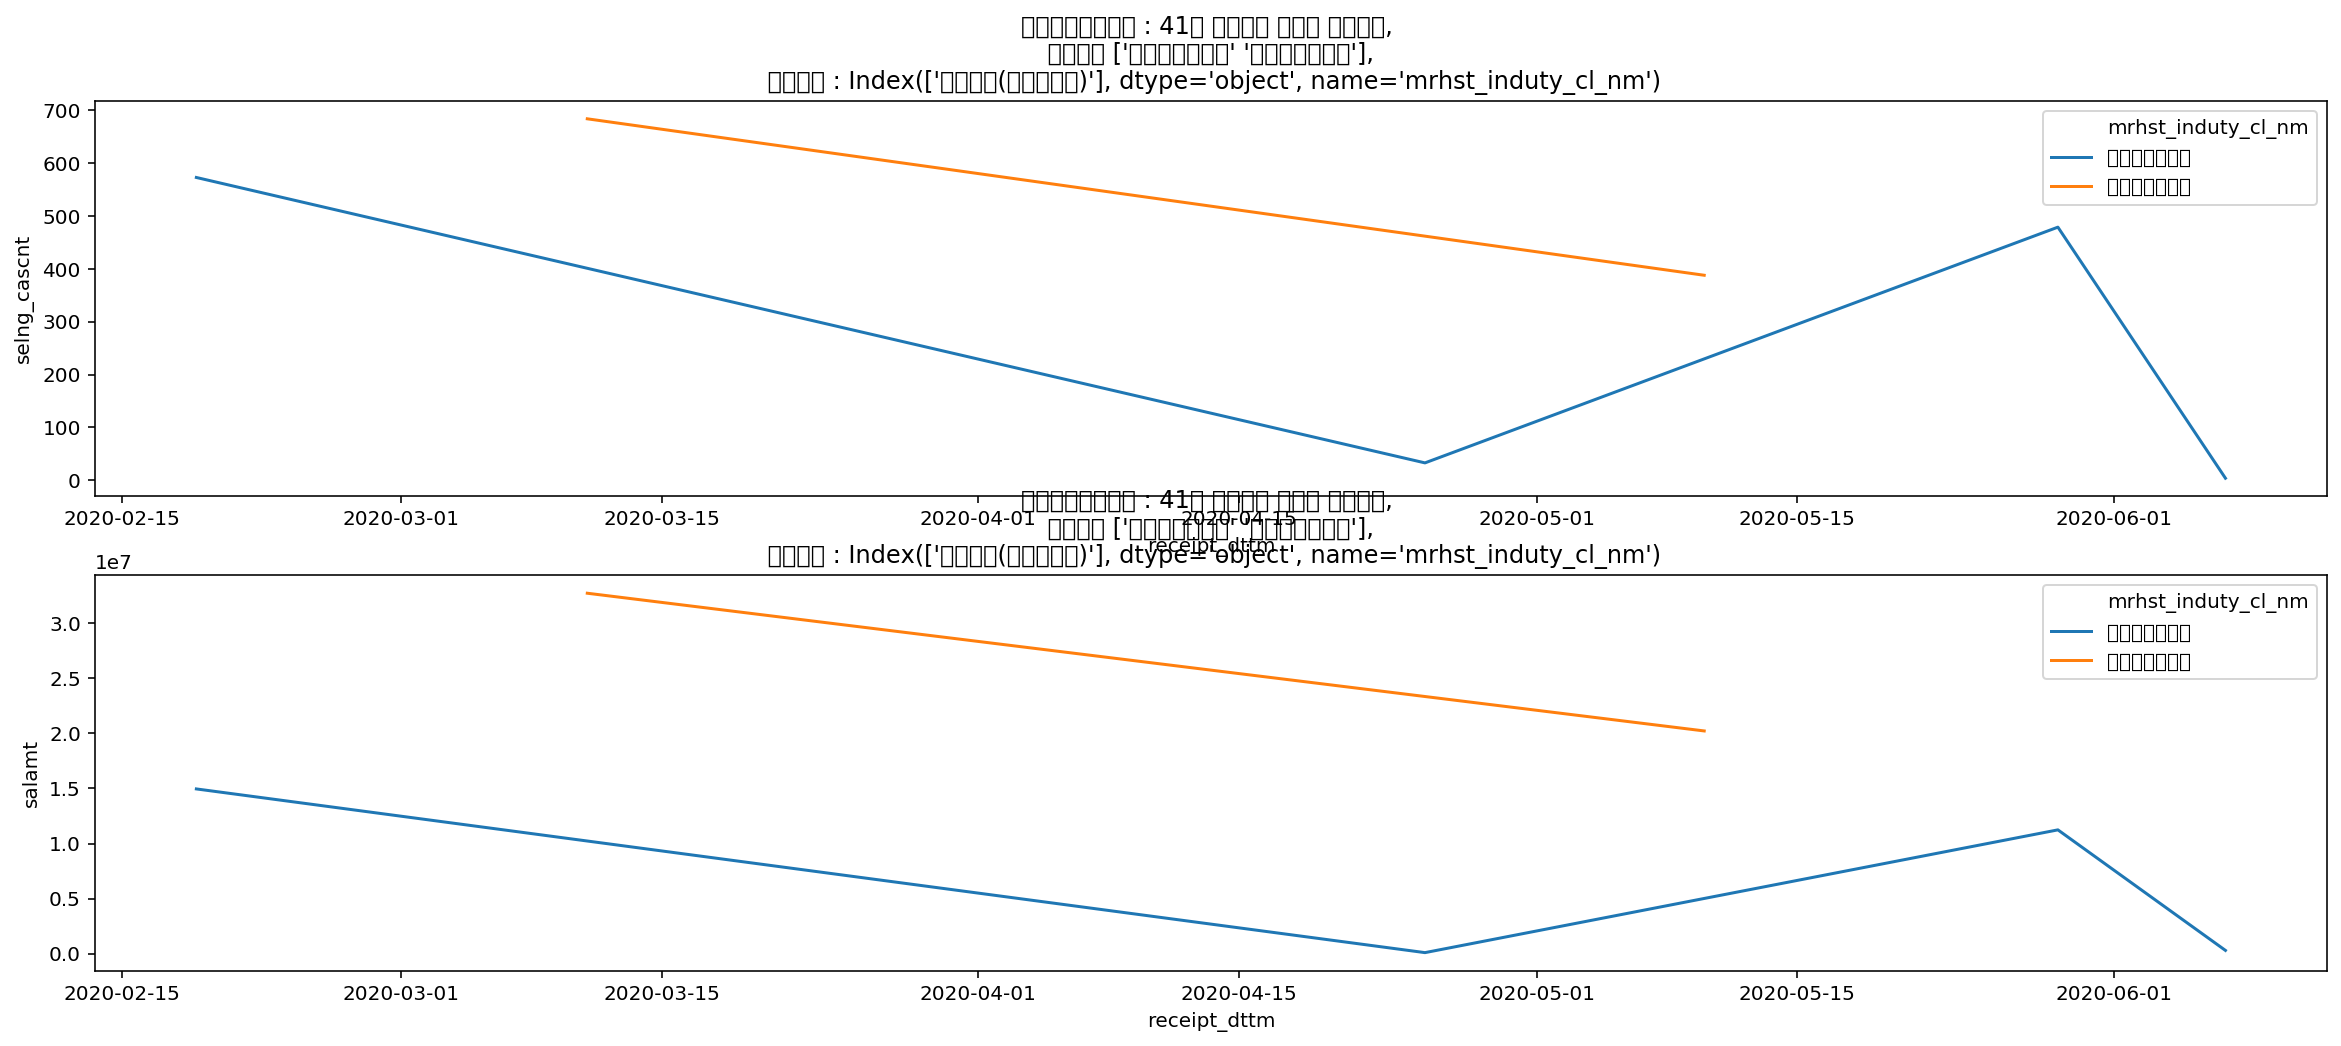

In [14]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '41'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())
if len(remove_ctgrys) >=3:
  remove_ctgrys = remove_ctgrys[:1]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 32.주방용구

List of 'mrhst_induty_cl_nm' sorted by its count Index(['주방 용구', '주방용식기', '정 수 기', '기타주방용구'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['토요일' '수요일' '목요일' '금요일' '월요일' '일요일' '화요일']
20
col_name = 정 수 기, the number of ctgry removed : 20


Text(0.5, 1.0, "국가표준분류코드 : 32에 해당하는 세분류 구매금액, \n 포함항목 ['주방용식기' '주방 용구' '기타주방용구'], \n 제외항목 : ['정 수 기']")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


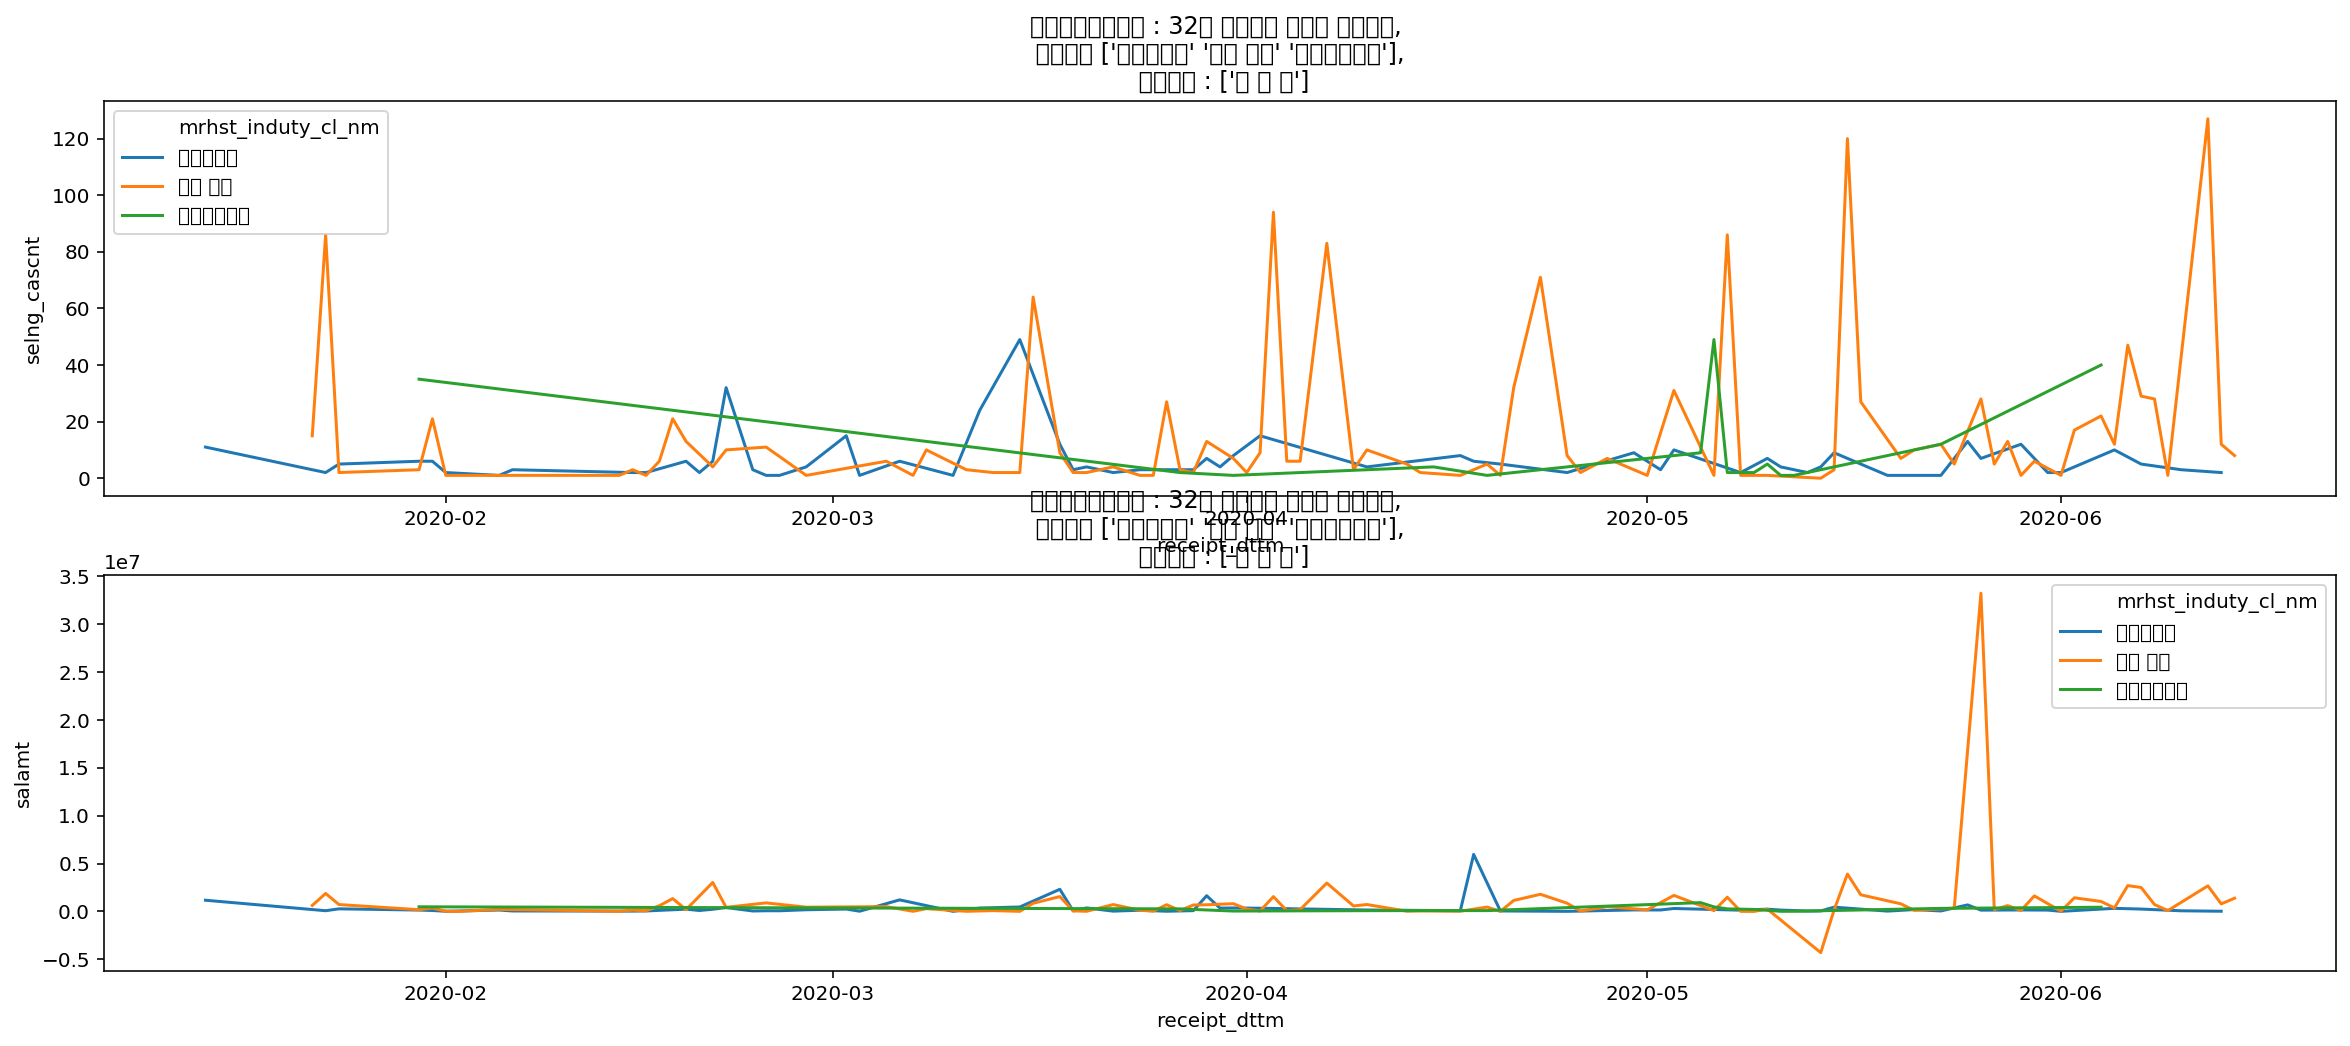

In [15]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '32'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())
remove_ctgrys =['정 수 기']
# if len(remove_ctgrys) >=4:
#   remove_ctgrys = remove_ctgrys[:1]
# else:
#   remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 60.자동차판매

List of 'mrhst_induty_cl_nm' sorted by its count Index(['이륜차판매', '수입자동차', '중고자동차', '국산 신차', '기타 운송'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['목요일' '화요일' '금요일' '토요일' '일요일' '월요일' '수요일']
4
col_name = 국산 신차, the number of ctgry removed : 4
160
col_name = 이륜차판매, the number of ctgry removed : 160


Text(0.5, 1.0, "국가표준분류코드 : 60에 해당하는 세분류 구매금액, \n 포함항목 ['수입자동차' '중고자동차' '기타 운송'], \n 제외항목 : ['국산 신차', '이륜차판매']")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


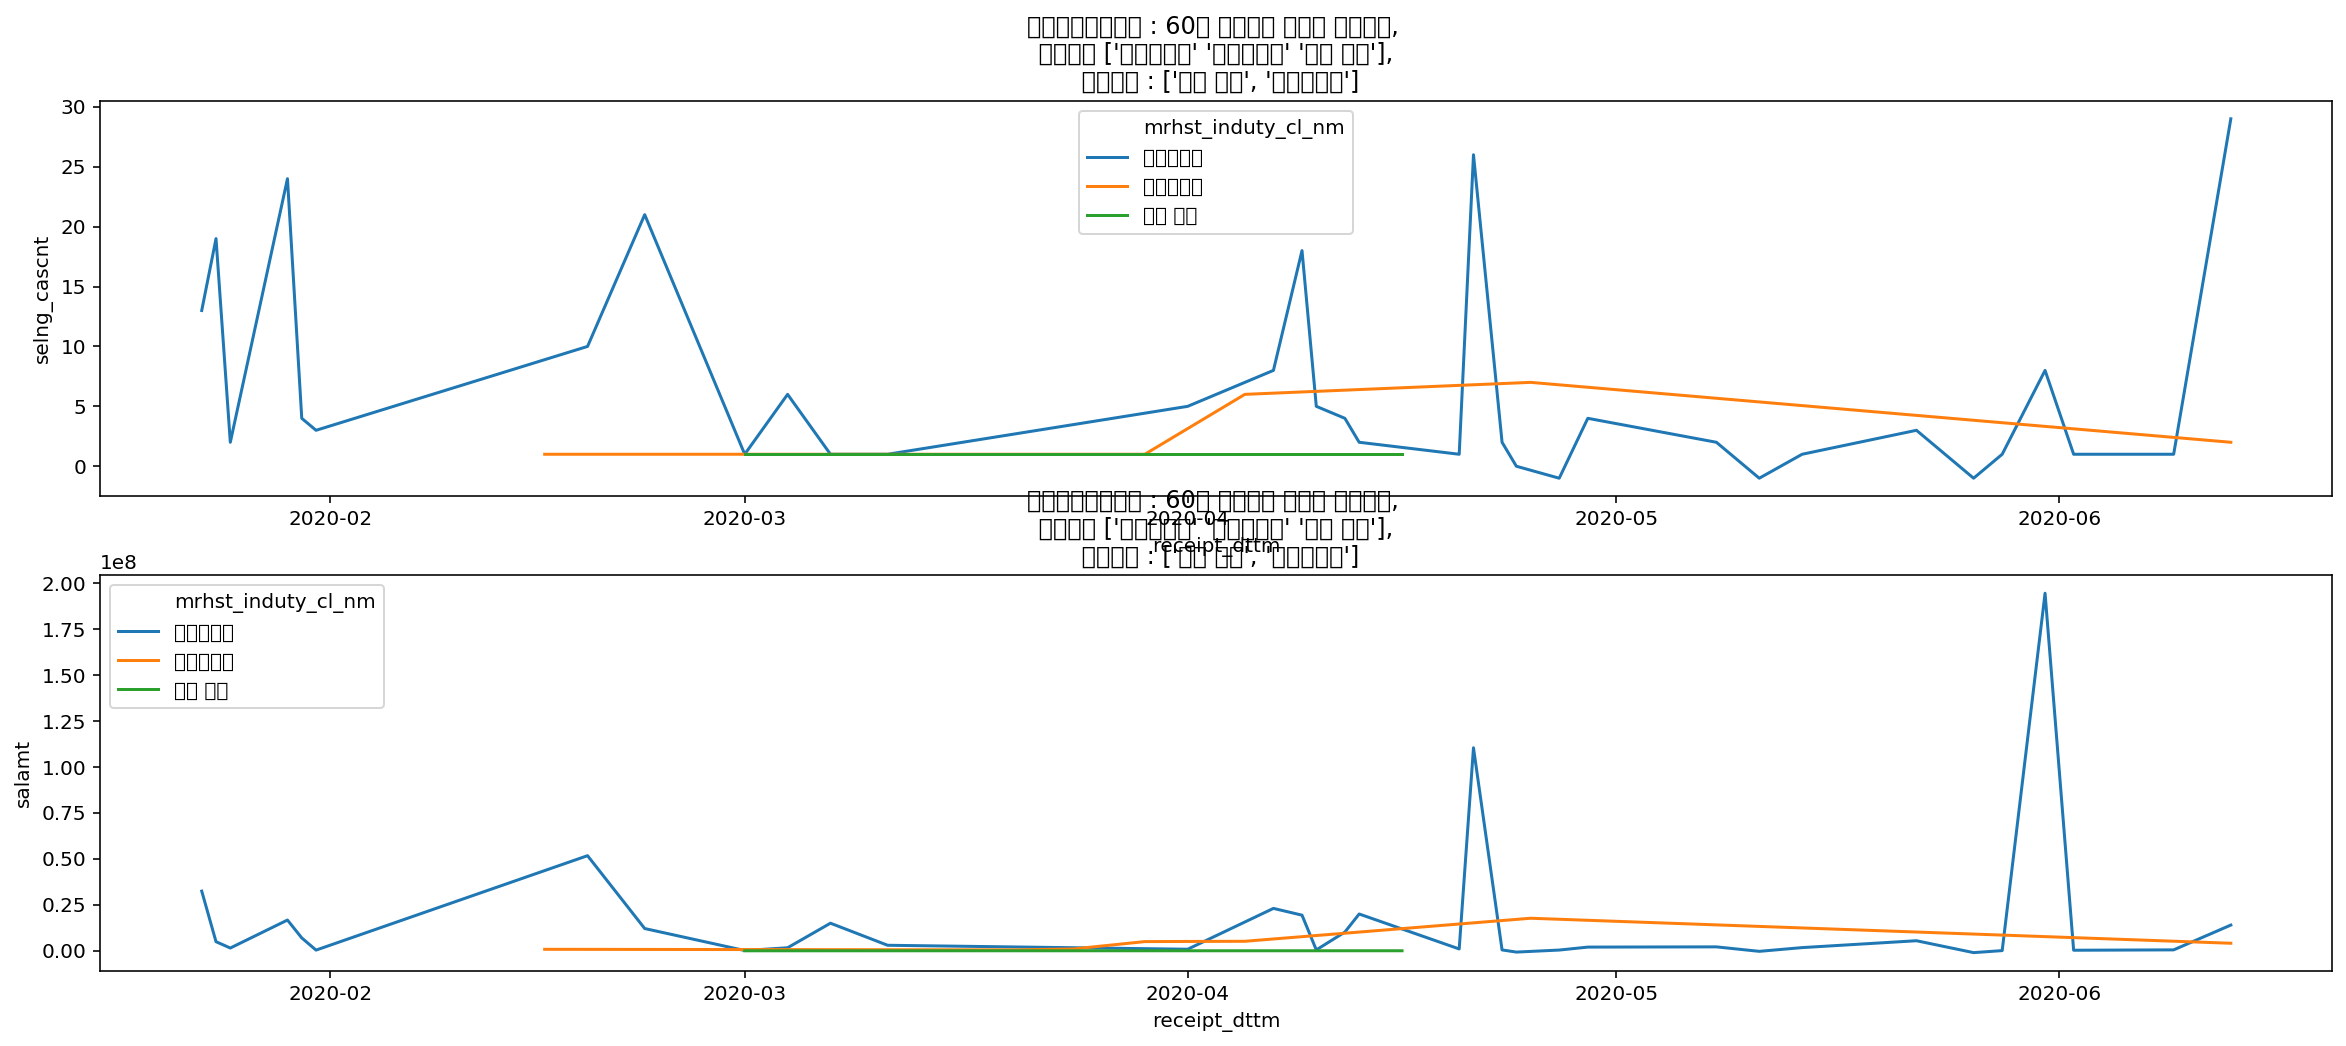

In [16]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '60'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())
remove_ctgrys = [
                 '국산 신차',
                 '이륜차판매', 
                #  '수입자동차',
                #  '중고자동차','기타 운송', '중고자동차위탁판매'
                 ]

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 62.보험류

List of 'mrhst_induty_cl_nm' sorted by its count Index(['손해 보험', '기타보험', '생명 보험'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['일요일' '목요일' '월요일' '토요일' '화요일' '수요일' '금요일']


Text(0.5, 1.0, "국가표준분류코드 : 62에 해당하는 세분류 구매금액, \n 포함항목 ['생명 보험' '기타보험' '손해 보험'], \n 제외항목 : []")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


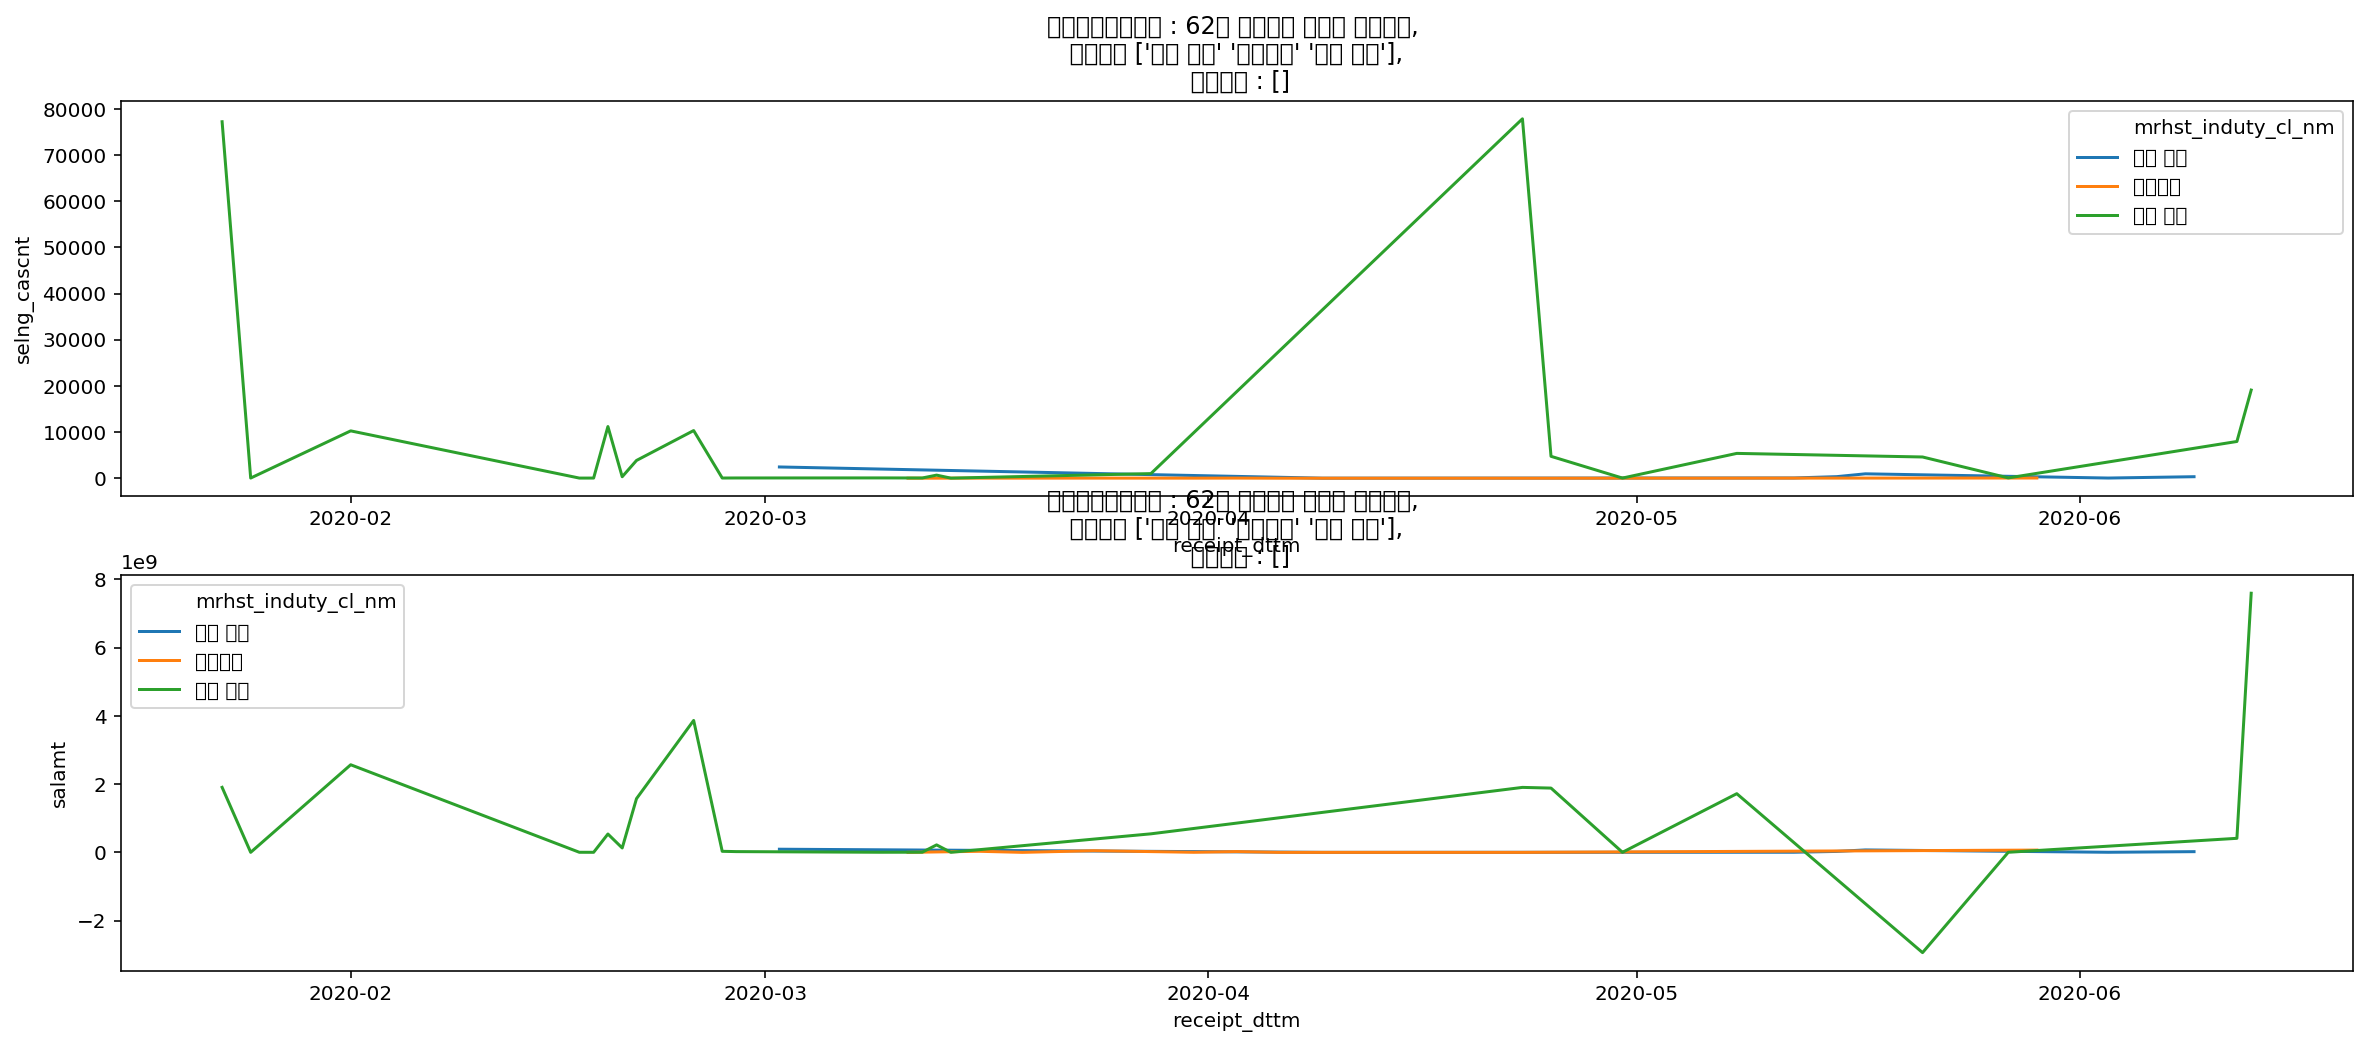

In [17]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '62'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())

if len(remove_ctgrys) >=5:
  remove_ctgrys = remove_ctgrys[:2]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 95.통신판매(홈쇼핑??)

List of 'mrhst_induty_cl_nm' sorted by its count Index(['통신판매(일반)', '통신판매(생활서비스)'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['수요일' '월요일' '금요일']


Text(0.5, 1.0, "국가표준분류코드 : 95에 해당하는 세분류 구매금액, \n 포함항목 ['통신판매(생활서비스)' '통신판매(일반)'], \n 제외항목 : []")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


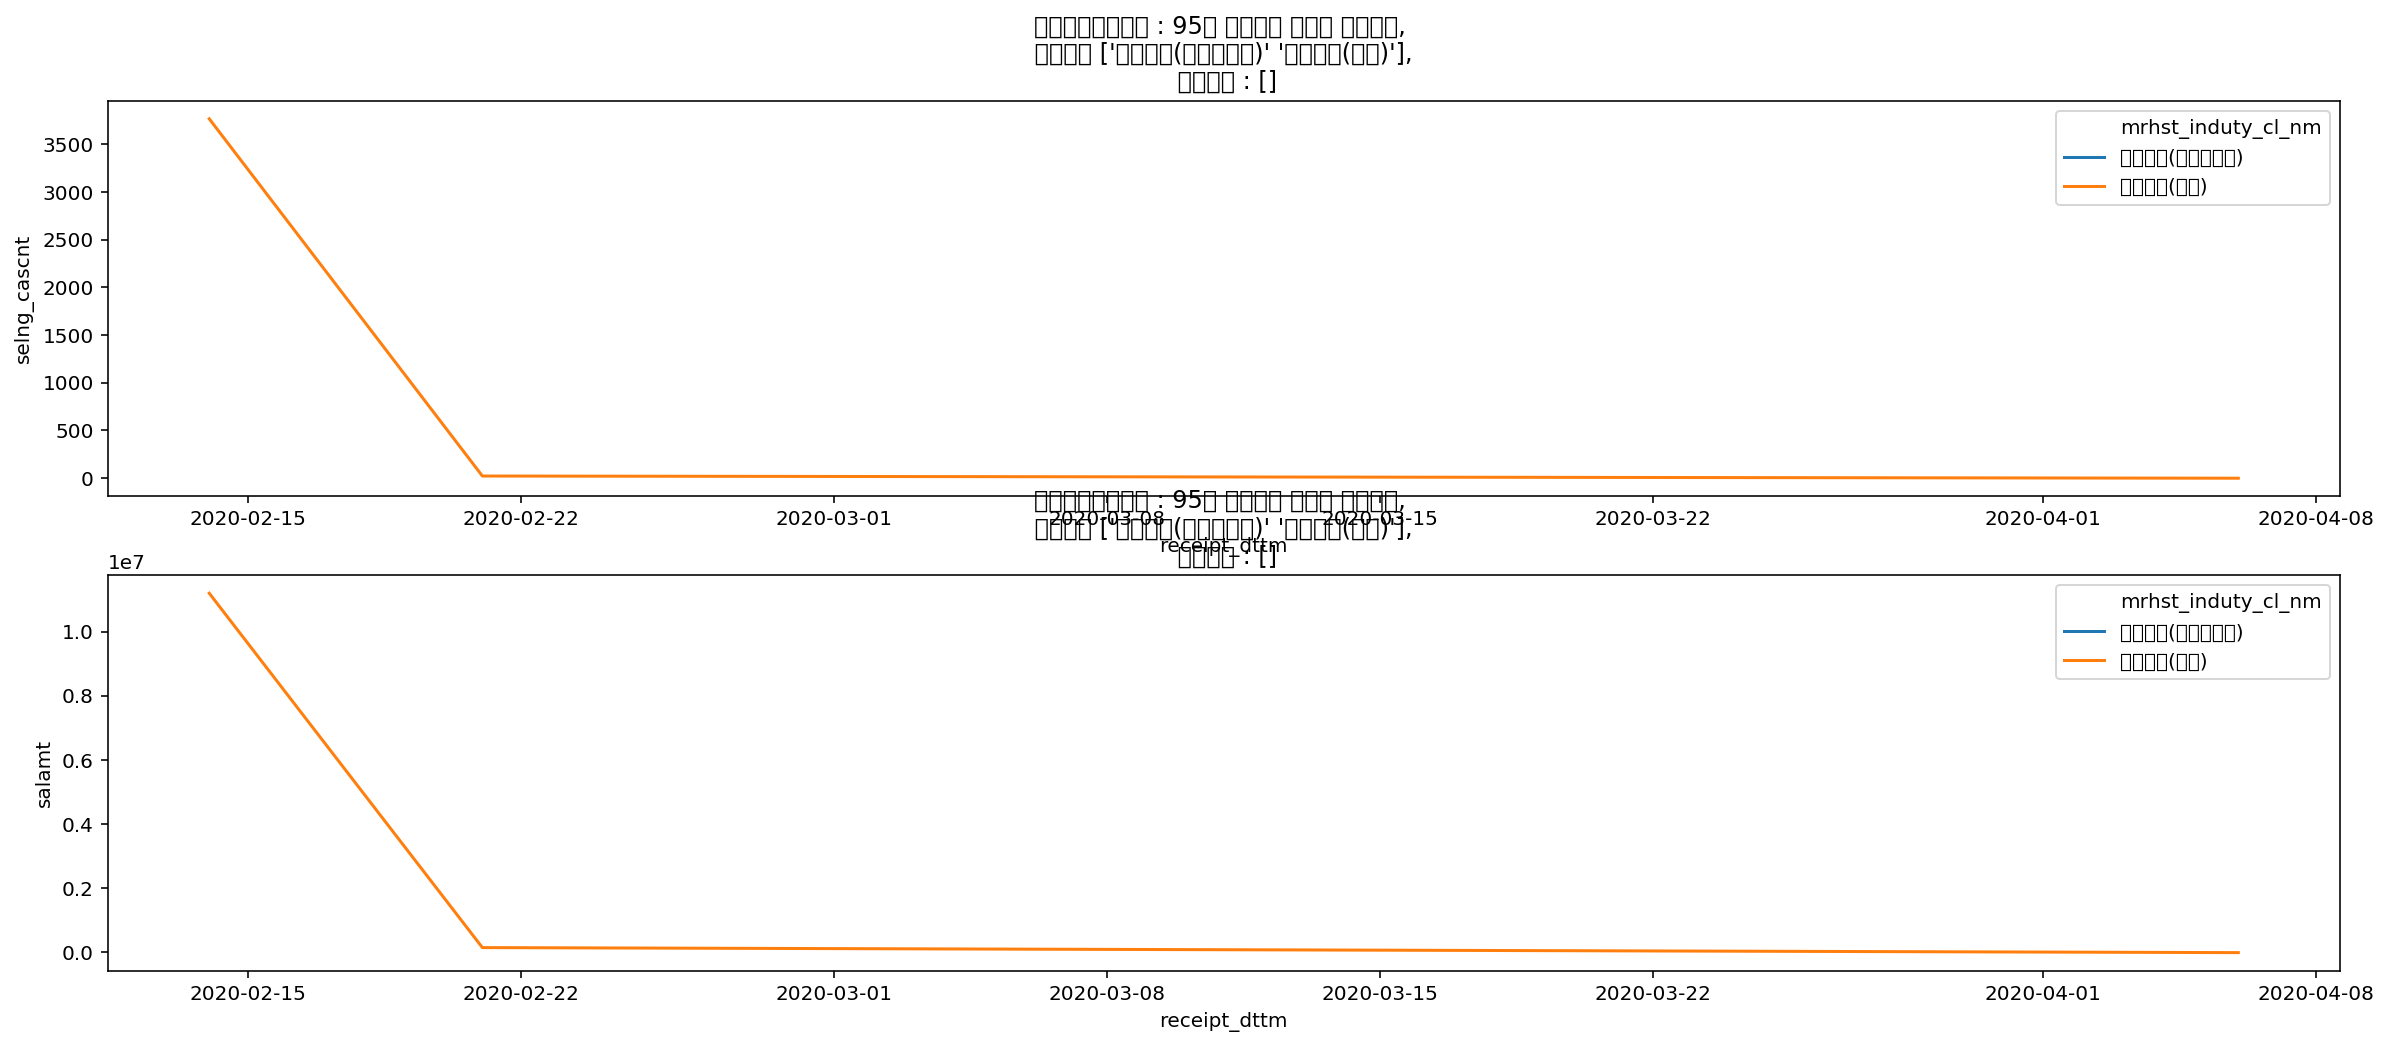

In [18]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '95'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())

if len(remove_ctgrys) >=3:
  remove_ctgrys = remove_ctgrys[:1]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

### 96.농업관련

List of 'mrhst_induty_cl_nm' sorted by its count Index(['비료/농약/사료/종자', '농기계', '기타농업관련'], dtype='object', name='mrhst_induty_cl_nm')
++++ target day  ['화요일' '월요일' '목요일' '토요일' '수요일' '일요일']


Text(0.5, 1.0, "국가표준분류코드 : 96에 해당하는 세분류 구매금액, \n 포함항목 ['비료/농약/사료/종자' '농기계' '기타농업관련'], \n 제외항목 : []")

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarni

C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Schelpptop\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0, flags=flags)


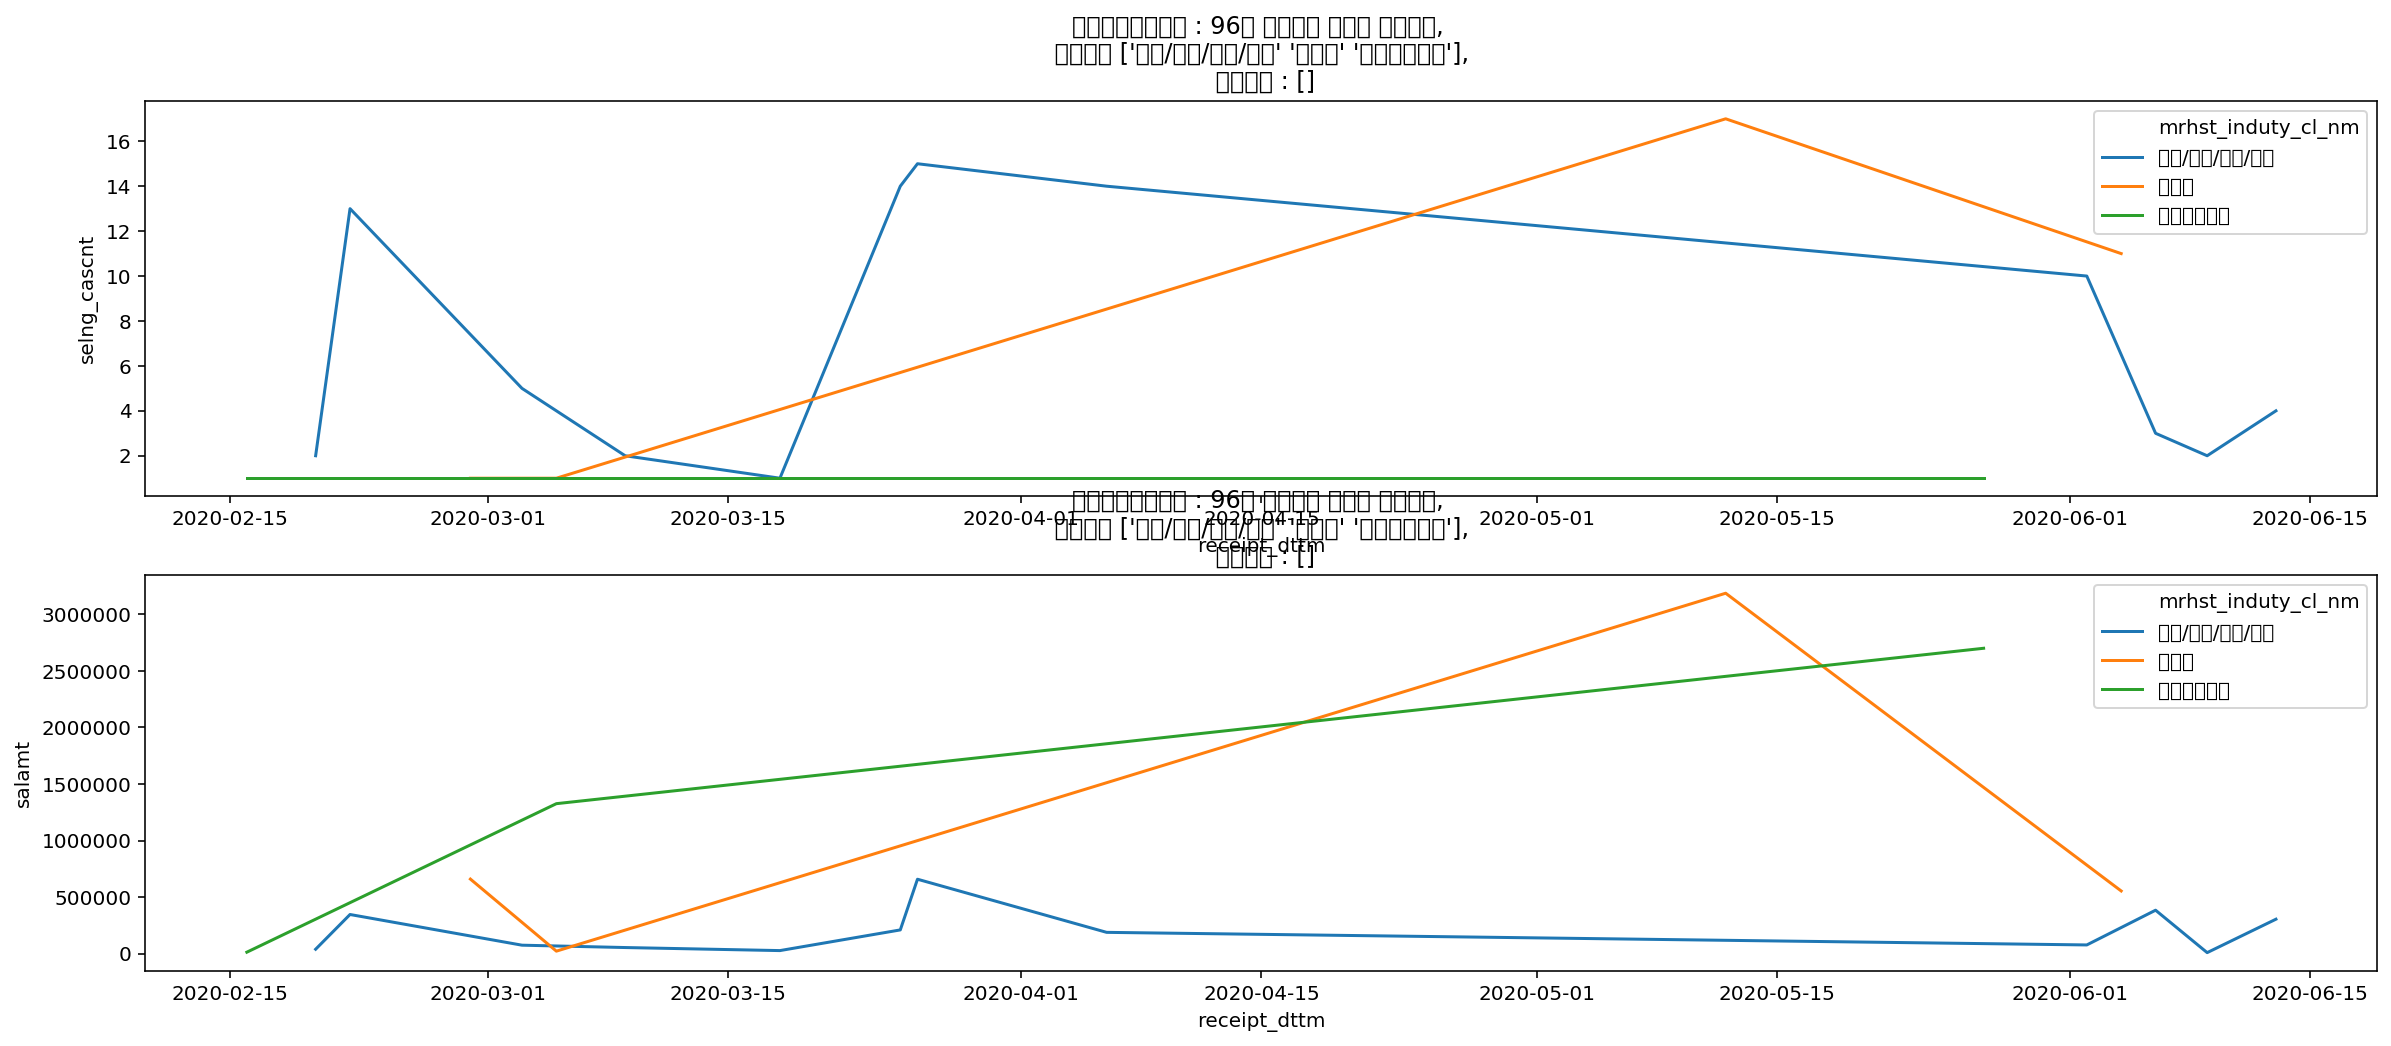

In [19]:
CODES  = ['84', '11', '43', '41', '32', '60', '62', '95', '96']
CODE   = '96'
X      = my_card[my_card["mrhst_induty_clm_code"] == "{}".format(CODE)]
Y      = ['selng_cascnt', "salamt"]

# 건수 및 금액으로 정렬한것중 상위 몇개를 제거한다
remove_ctgrys = X.groupby('mrhst_induty_cl_nm').count().sort_values(Y, ascending=False).index
print("List of 'mrhst_induty_cl_nm' sorted by its count", remove_ctgrys)
print("++++ target day ", X["week"].unique())

if len(remove_ctgrys) >=5:
  remove_ctgrys = remove_ctgrys[:2]
else:
  remove_ctgrys = []

for remove_ctgry in remove_ctgrys:
    print(len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]))
    if len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) > 0:
        print( "col_name = {}, the number of ctgry removed : {}".format(str(remove_ctgry),
                len( X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)) )
        X = X.drop(index = X[X["mrhst_induty_cl_nm"]==remove_ctgry].index)

    elif len(X[X["mrhst_induty_cl_nm"]== remove_ctgry]) == 0:
        print("No ctgrys :", str(remove_ctgry) )
        
# 제거된것으로 그래프를 그려본다
fig,axes = plt.subplots(2,1,figsize=(20,8))
sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d'), 
              y = Y[0], # 개수
              data = X, ax=axes[0], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매건수, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )

sns.lineplot( x = pd.to_datetime(X['receipt_dttm'], format='%Y%m%d' ), 
              y = Y[1], # 금액 
              data = X, ax=axes[1], hue = "mrhst_induty_cl_nm", estimator = np.sum, ci = None 
).set_title("국가표준분류코드 : {}에 해당하는 세분류 구매금액, \n 포함항목 {}, \n 제외항목 : {}"
            .format(CODE, X["mrhst_induty_cl_nm"].unique(), remove_ctgrys[:len(remove_ctgrys)]) )